In [1]:
import numpy as np
import lbg_forecast.igm as igm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
z2 = np.loadtxt("inoue14/z2.txt")
z3 = np.loadtxt("inoue14/z3.txt")
z4 = np.loadtxt("inoue14/z4.txt")
z5 = np.loadtxt("inoue14/z5.txt")
z6 = np.loadtxt("inoue14/z6.txt")

Text(0, 0.5, 'Transmission')

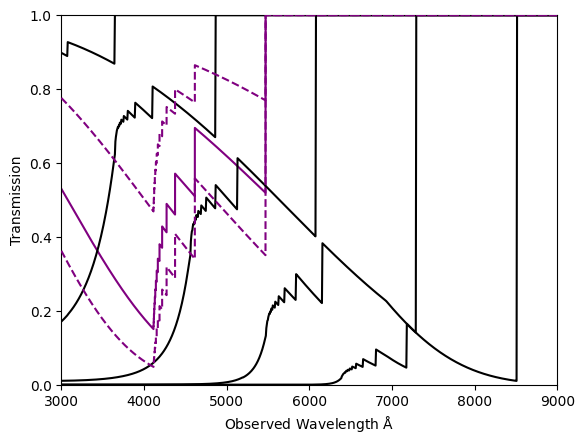

In [9]:
zs = np.array([3.5])#np.arange(2, 7, 1)

l_obs = np.linspace(3000, 9000, int(9000-3000)*10)
df_igm = 0.6

for z in zs:

    tau_eff = igm.lyman_continuum_tau(l_obs, z)
    tau_eff_series = igm.lyman_series_line_tau(l_obs, z)
    plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series)), ls='-', c='purple')
    plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series)*(1+df_igm)), ls='--', c='purple', zorder=1000)
    plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series)*(1-df_igm)), ls='--', c='purple', zorder=1000)

#plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series))*1.5)
#plt.plot(l_obs, np.exp(-1*(tau_eff + tau_eff_series))*0.5)
plt.plot(z2[:, 0], z2[:, 1], c='k')
plt.plot(z3[:, 0], z3[:, 1], c='k')
plt.plot(z4[:, 0], z4[:, 1], c='k')
plt.plot(z5[:, 0], z5[:, 1], c='k')
plt.plot(z6[:, 0], z6[:, 1], c='k')
plt.xlim(3000, 9000)
plt.ylim(0, 1.0)
plt.xlabel("Observed Wavelength $\mathrm{\AA}$")
plt.ylabel("Transmission")


(0.0, 1.0)

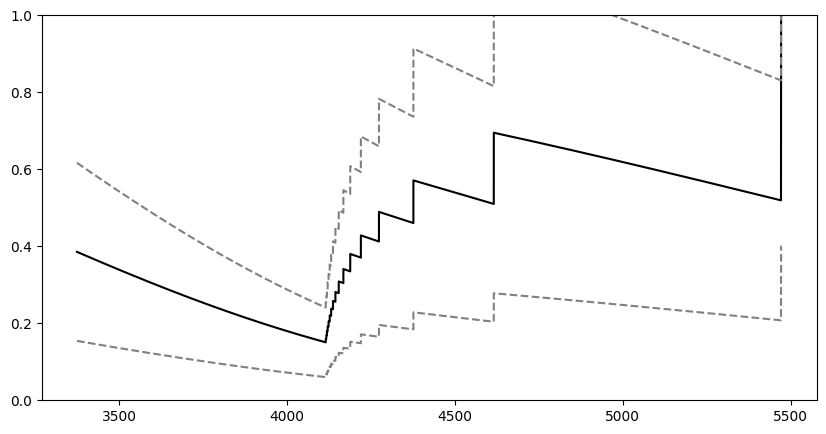

In [4]:
igm.plot_transmission_curves(3.5, 0.6)
plt.ylim(0, 1)

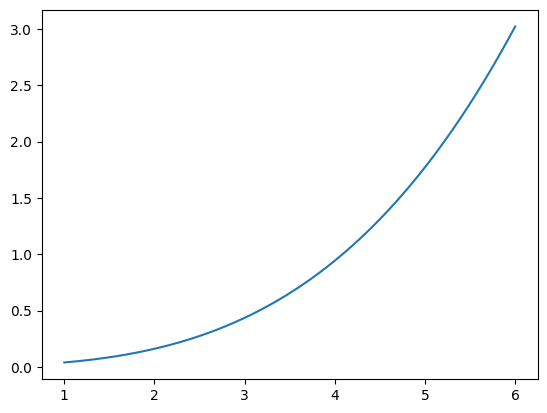

In [5]:
igm.plot_lya_transmission(1, 6, tau=True)